# Usando dados com pré-processamento com ambas simetrias

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from data.df_io import read, get_feat_lables
from data.df_prep import get_onexall_split, get_specific_split
from ai_models.PLA import PLA
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line, show_mult_model_lines


train_path = Path("../digits/db/train_redu.csv")
test_path = Path("../digits/db/test_redu.csv")

In [2]:
df_train = read(train_path, sep=",")
df_test = read(test_path, sep=",")

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

# 0xAll

## Get 0xAll dataset

In [4]:
X_train_0xAll, Y_train_0xAll = get_onexall_split(X_train, Y_train, 0)
X_test_0xAll, Y_test_0xAll = get_onexall_split(X_test, Y_test, 0)

In [5]:
base_column = np.ones((X_train_0xAll.shape[0], 1))

In [6]:
X_train_0xAll = np.hstack((base_column, X_train_0xAll))

In [7]:
base_column = np.ones((X_test_0xAll.shape[0], 1))
X_test_0xAll = np.hstack((base_column, X_test_0xAll))

## Train and test 0xAll logistic regression

In [8]:
model4zero = PLA()
it, w4zero, W  = model4zero.fit(X_train_0xAll, Y_train_0xAll, epochs=20000)

### Ein eval

In [9]:
Y_pred = model4zero.predict(X_train_0xAll, w4zero)
compute_acc(Y_train_0xAll, Y_pred)

0.7854528819762122

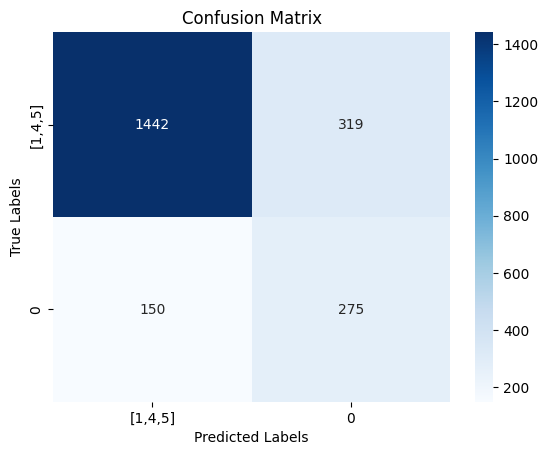

In [10]:
confusion(Y_train_0xAll, Y_pred, classe_pos=0, classe_neg="[1,4,5]")

### Eout eval

In [12]:
Y_pred = model4zero.predict(X_test_0xAll, w4zero)
compute_acc(Y_test_0xAll, Y_pred)

0.7847533632286996

In [13]:
eficiency_report(Y_test_0xAll, Y_pred)

{'acc': 0.7847533632286996,
 'precision': np.float64(0.4642857142857143),
 'recall': np.float64(0.6559633027522935),
 'f1': np.float64(0.5437262357414449)}

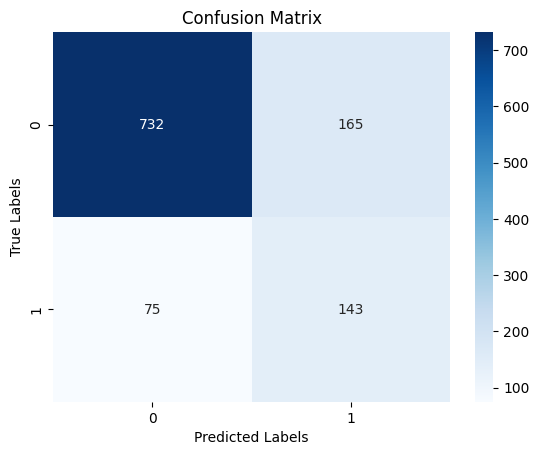

In [14]:
confusion(Y_test_0xAll, Y_pred, 0, 1)

### Model plot

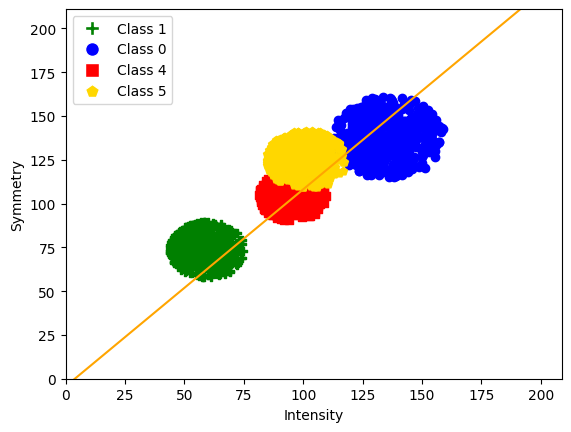

In [15]:
X_train_plot, Y_train_plot = get_onexall_split(X_train, Y_train, 0, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test, Y_test, 0, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4zero,
    1,
    0,
    4,
    5,
)

# 1xAll (except 0)

## Get 1xAll (except 0) dataset

In [16]:
X_train4one, Y_train4one = get_feat_lables(df_train[df_train.label != 0])
X_test4one, Y_test4one = get_feat_lables(df_test[df_test.label != 0])

In [17]:
X_train_1xAll, Y_train_1xAll = get_onexall_split(X_train4one, Y_train4one, 1)
X_test_1xAll, Y_test_1xAll = get_onexall_split(X_test4one, Y_test4one, 1)

In [18]:
base_column = np.ones((X_train_1xAll.shape[0], 1))

In [19]:
X_train_1xAll = np.hstack((base_column, X_train_1xAll))

In [20]:
base_column = np.ones((X_test_1xAll.shape[0], 1))
X_test_1xAll = np.hstack((base_column, X_test_1xAll))

## Train and test 0xAll logistic regression

In [21]:
model4one = PLA()
it, w4one, W = model4one.fit(X_train_1xAll, Y_train_1xAll, epochs=20000)

### Ein eval

In [22]:
Y_pred = model4one.predict(X_train_1xAll, w4one)
compute_acc(Y_train_1xAll, Y_pred)

0.8256672345258376

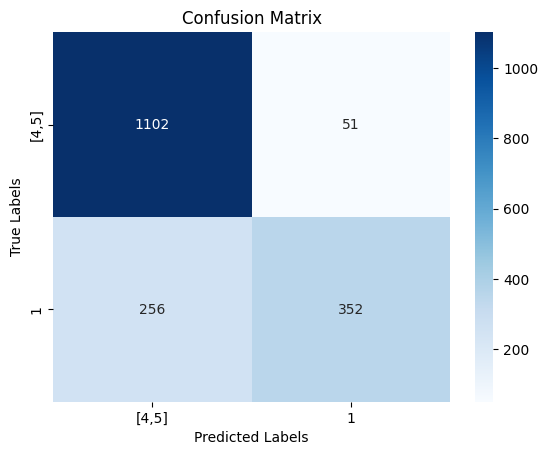

In [23]:
confusion(Y_train_1xAll, Y_pred, classe_pos="1", classe_neg="[4,5]")

### Eout eval

In [24]:
Y_pred = model4one.predict(X_test_1xAll, w4one)
compute_acc(Y_test_1xAll, Y_pred)

0.8283166109253066

In [25]:
eficiency_report(Y_test_1xAll, Y_pred)

{'acc': 0.8283166109253066,
 'precision': np.float64(0.875),
 'recall': np.float64(0.5513698630136986),
 'f1': np.float64(0.6764705882352942)}

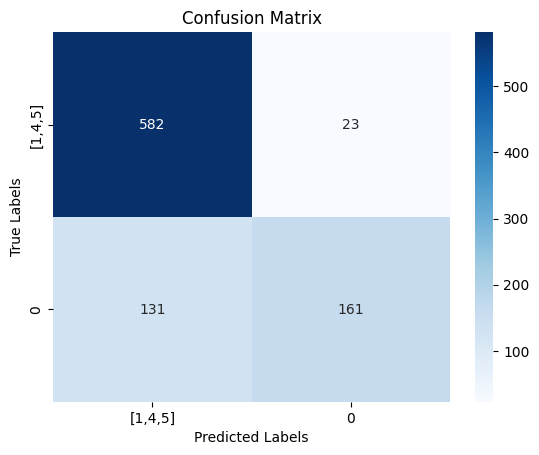

In [28]:
confusion(Y_test_1xAll, Y_pred, classe_pos=0, classe_neg="[1,4,5]")

### Model plot

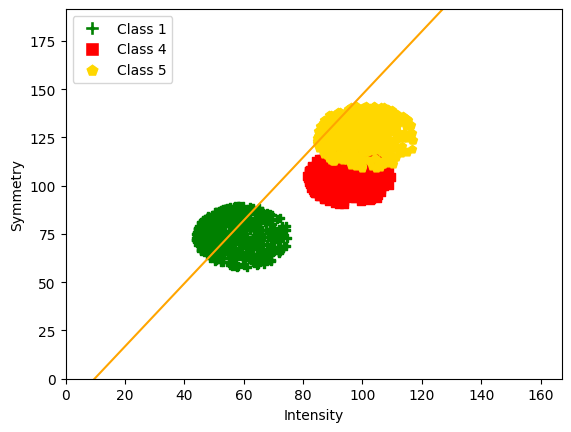

In [29]:
X_train_plot, Y_train_plot = get_onexall_split(X_train4one, Y_train4one, 1, False)
X_test_plot, Y_test_plot = get_onexall_split(X_test4one, Y_test4one, 1, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4one,
    1,
    4,
    5,
    None
)

# 4x5

## Get 4x5 dataset

In [31]:
X_train_4x5, Y_train_4x5 = get_specific_split(X_train, Y_train, 4, 5)
X_test_4x5, Y_test_4x5 = get_specific_split(X_test, Y_test, 4, 5)

In [32]:
base_column = np.ones((X_train_4x5.shape[0], 1))

In [33]:
X_train_4x5 = np.hstack((base_column, X_train_4x5))

In [34]:
base_column = np.ones((X_test_4x5.shape[0], 1))
X_test_4x5 = np.hstack((base_column, X_test_4x5))

## Train and test 4x5 logistic regression

In [35]:
model4four = PLA()
it, w4four, W = model4four.fit(X_train_4x5, Y_train_4x5, epochs=20000)

### Ein eval

In [36]:
Y_pred = model4four.predict(X_train_4x5, w4four)
compute_acc(Y_train_4x5, Y_pred)

0.7484822202948829

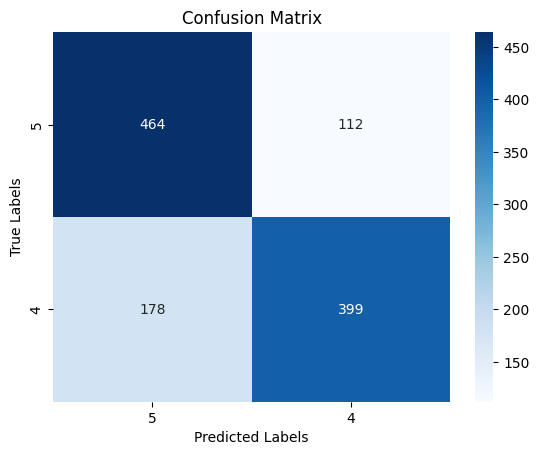

In [37]:
confusion(Y_train_4x5, Y_pred, classe_pos="4", classe_neg="5")

### Eout eval

In [38]:
Y_pred = model4four.predict(X_test_4x5, w4four)
compute_acc(Y_test_4x5, Y_pred)

0.7355371900826446

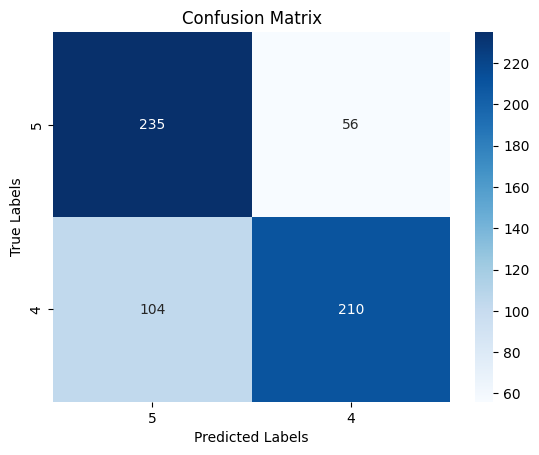

In [39]:
confusion(Y_test_4x5, Y_pred, classe_pos=4, classe_neg=5)

In [40]:
eficiency_report(Y_test_4x5, Y_pred)

{'acc': 0.7355371900826446,
 'precision': np.float64(0.7894736842105263),
 'recall': np.float64(0.6687898089171974),
 'f1': np.float64(0.7241379310344828)}

### Model plot

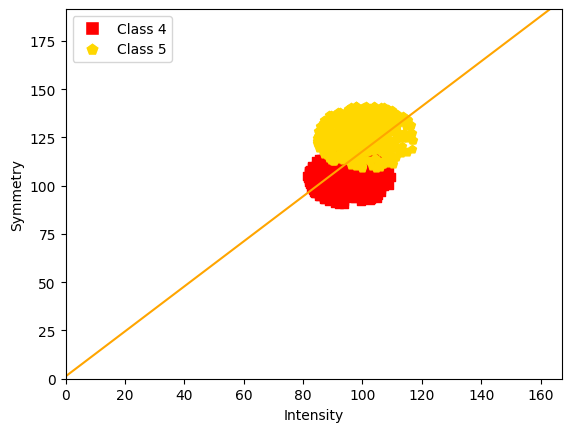

In [41]:
X_train_plot, Y_train_plot = get_specific_split(X_train, Y_train, 4, 5, False)
X_test_plot, Y_test_plot = get_specific_split(X_test, Y_test, 4, 5, False)

show_model_line(
    pd.DataFrame(X_train_plot, columns=["intensity", "symmetry"]),
    pd.DataFrame(Y_train_plot, columns=["label"]),
    w4four,
    4,
    5,
    None,
    None,
)

# Final prediction

In [42]:
X_test = X_test.drop("Unnamed: 0", axis=1)
X_test.head()

,intensity,symmetry
0,147.93,130.471765
1,131.05,122.725490
2,134.89,151.727647
3,139.98,133.918824
4,129.58,130.272745


In [43]:
np.hstack((1, X_test.iloc[0].to_numpy()))

array([  1.        , 147.93      , 130.47176471])

In [44]:
Y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [51]:
Y_pred = []
c1 = 0
c4 = 0
c0 = 0
c5 = 0
for i in range(len(X_test)):
    # for model in [w4zero, w4one, w4four]:
    # for model in [model4zero, model4one, model4four]:
    
    if model4zero.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4zero, single=True) == 1:
        Y_pred.append(0)
        c1+=1
    elif model4one.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4one, single=True) == 1:
        Y_pred.append(1)
        c0+=1
    elif model4four.predict(np.hstack((1, X_test.iloc[i].to_numpy())), w4four, single=True) == 1:
        Y_pred.append(4)
        c4+=1
    else:
        Y_pred.append(5)
        c5+=1
    

In [52]:
print(c1, c0, c4, c5)

308 184 212 411


In [53]:
compute_acc(Y_pred, Y_test.to_numpy())

0.3022421524663677

In [54]:
eficiency_report(Y_pred, Y_test.to_numpy(), avarage=None)

{'acc': 0.3022421524663677,
 'precision': array([0.        , 0.1130137 , 0.29299363, 0.72852234]),
 'recall': array([0.        , 0.10714286, 0.43396226, 0.51581509]),
 'f1': array([0.        , 0.11      , 0.34980989, 0.6039886 ])}

# Final plot

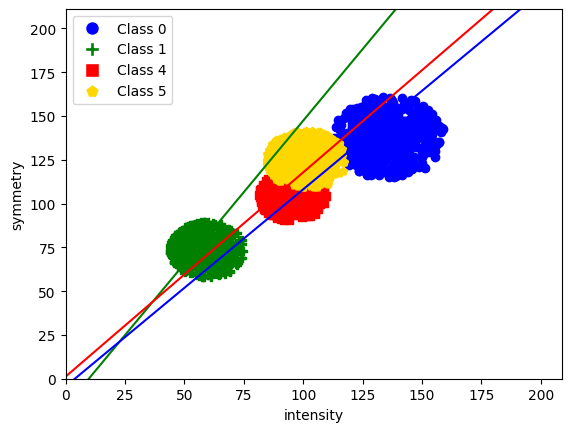

In [55]:
show_mult_model_lines(
    pd.DataFrame(X_train, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train, columns=["label"]), 
    columns=["bias", "intensity", "symmetry", "label"],
    Ws=[w4one, w4zero, w4four],
)